# MAT281 - Tarea 1

## SVD y Gatitos 

En este ejercicio utilizaremos la descomposición valor singular con tal de comprimir imágenes, si bien hay algoritmos mucho mejores para esto, será un ejercicio muy ilustrativo. 

### Recuerdo

La descomposición SVD de una matriz $A$ de tamaño $m \times n$ posee la siguiente forma 
$$
A = U \Sigma V^H
$$
donde $\Sigma$ es diagonal $m \times n$, mientras que $U$ y $V$ son matrices unitarias $m \times m$ and $n \times n$, respectivamente. Los elementos diagonales de $\Sigma$ son no-negativos y aquellos valores positivos son llamados **valores singulares** de $A$. Como convención los valores singulares se listan en orden decreciente a lo largo de la diagonal. Las columnas de $U$ y $V$ son llamadas **vectores singulares** izquierdos y derechos respectivamente.

PD: Recuerda que $A^H = \bar{A}^\top$, es decir, la matriz traspuesta de la matriz conjugada.

In [1]:
import numpy as np
from scipy.linalg import svd

np.random.seed(42)  # Para reproducibilidad de resultados

Por ejemplo para una matriz de $2 \times 2$:

In [2]:
A = np.array([[0.1, 0.5], [0.4, 0.8]])
u, s, vh = svd(A)

#### Ejercicio 1

(5 puntos)

Define la función `svd_validaton` tal que:

1. El _input_ sea un arreglo bidimensional `A` de tamaño $m \times n$.
2. Obtenga la descomposición valor singular de `A`.
3. Retorne `True` o `False` si es que se cumple la igualdad 
$$
A = \sum_{l=1}^{\min(m, n)} \sigma_l \; u_l v_l^H,
$$
donde $\sigma_l$ corresponden a los valores singulares de $A$, mientras que $u_i$ y $v_j$ a las columnas de $U$ y $V$ respectivamente. Hint: Utiliza `np.allclose` con la tolerancia por defecto.

In [3]:
def svd_validation(A):
    u, s, vh = svd(A)
    M = np.zeros(np.shape(A)) #inicializa una matriz nula para ir acumulando la suma
    for i in range(1, min(np.shape(A)) + 1): 
        M += s[i-1]*(u[:,i-1:i]@vh[i-1:i,:])
    return np.allclose(A, M)

In [4]:
A_test = np.random.randint(100, size=(20, 5))
svd_validation(A_test)

True

### Geometría

Considerar una matriz `A` como un operador lineal tiene una interpretación geométrica muy sencilla, transforma una (hyper)-esfera en una (hyper)-elipse. Por ejemplo, consideremos una esfera unitaria en $\mathbb{R}^2$.

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def show_circle(circle):
    plt.plot(circle[0, :], circle[1, :])
    plt.axis('image');

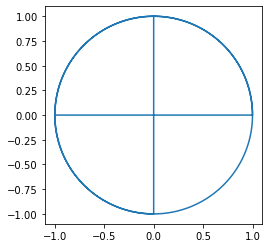

In [7]:
t = np.linspace(0, 3.5 * np.pi , num=300)
l = np.linspace(-1, 1, num=10)
z = np.zeros_like(l)
circle = np.array(
    [
        np.concatenate([l, np.cos(t), z]),
        np.concatenate([z, np.sin(t), l])
    ]
)

show_circle(circle) 

Luego, al utilizar `A` como un operador lineal, es decir $A C$.

In [8]:
print(A)

[[0.1 0.5]
 [0.4 0.8]]


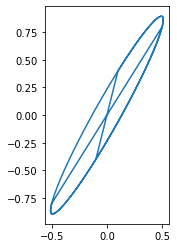

In [9]:
show_circle(A @ circle)

#### Ejercicio 2

(5 puntos)

* Obtén la descomposición SVD de $A$, tal que $A = U \Sigma V^H$.
* Grafica el resultado de aplicar los siguientes operadores lineales a la circunferencia unitaria:
    - $U$
    - $\Sigma$
    - $V^H$
* Explica con tus palabras la transformación de la circunferencia unitaria luego de aplicar los operadores anteriores, ¿Influye en algo que $U$ y $V$ sean unitarias?
* ¿Qué relación tienen los operadores anteriores respecto a aplicar el operador lineal $A$?

In [10]:
u, s, vh = svd(A)

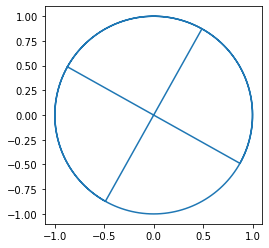

In [11]:
show_circle(u@circle)

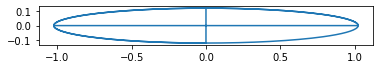

In [12]:
show_circle(np.array([[s[0],0],[0,s[1]]])@circle)

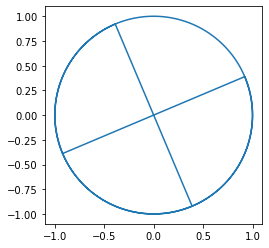

In [13]:
show_circle(vh@circle)

__Respuesta:__ Las matrices $U$ y $V$ rotan la circunferencia, esto pasa precisamente porque las matrices son unitarias, al ser unitarias, es un producto de rotaciones y reflexiones. Por otro lado, $\Sigma$ aplasta verticalmente la circunferencia.

__Respuesta:__ El operador lineal $A$ es el producto de los anteriores, por tanto aplicar el operador lineal $A$ consiste en rotar, aplastar verticalmente y luego volver a rotar.

### Aproximación Rango Menor

Existen muchas maneras de expresar una matriz como una suma de matrices de menor rango, por ejemplo:

$$
\begin{bmatrix}
a & b \\
c & d 
\end{bmatrix}
= 
\begin{bmatrix}
a & 0 \\ 0 & 0  
\end{bmatrix}
+ 
\begin{bmatrix}
0 & b \\ 0 & 0 
\end{bmatrix}
+ 
\begin{bmatrix}
0 & 0 \\ c & 0 
\end{bmatrix}
+
\begin{bmatrix}
0 & 0 \\ 0 & d 
\end{bmatrix}.
$$

Cada una de las matrices del lado derecho pueden tener rango a lo más 1.

En el primer ejercicio demostraste que la descomposición SVD $A$ puede ser expresada como una suma de matrices. Sin embargo, cada una de estas matrices tiene rango 1! Esto pues cada una de estas matrices se forma a partir de los productos externos entre los vectores $u_l$ y $v_l$, es decir $u_l v_l^H$.

La pregunta natural es:

_¿Cómo obtener una buena aproximación de $A$ utilizando matrices de rango muy bajo?_

Bueno, aquí va un teorema.

__Teorema 1:__



Sea $A$ matriz de tamaño $m \times n$. Para cualquier $0 \le \ell \le r = \text{rank}(A)$, se define la matriz 
$$
A_\ell = \sum_{j=1}^{\ell} \sigma_j u_j v_j^H,
$$
utilizando los valores singulares $\sigma_j$ y los vectores singulares (izquierdos y derechos) $u_j, v_j$ de $A$,  i.e., $A_\ell$ se compone de la suma de los primeros $\ell$ términos de la descomposición SVD escrita como una suma de productor externos. Luego, el mínimo de  $\| A - B \|_F$ sobre todas las matrices $B$ de tamaño $m \times n$ y rango no mayor a $\ell$ se obtiene por $\| A - A_\ell \|_F$ y el mínimo que se alcanza es  $(\sigma_{\ell+1}^2 + \cdots + \sigma_r^2)^{1/2}$.

Recuerda que la norma de Frobenius se define como

$$
\| A \|_F = \bigg( \sum_{i, j} |A_{ij}|^2 \bigg)^{1/2}.
$$

Motivaremos el ejercicio utilizando imágenes en escala de grises ya que es muy intuitivo, fácil de ver y se puede considerar que la imagen es una matriz.

In [14]:
from pathlib import Path
from PIL import Image

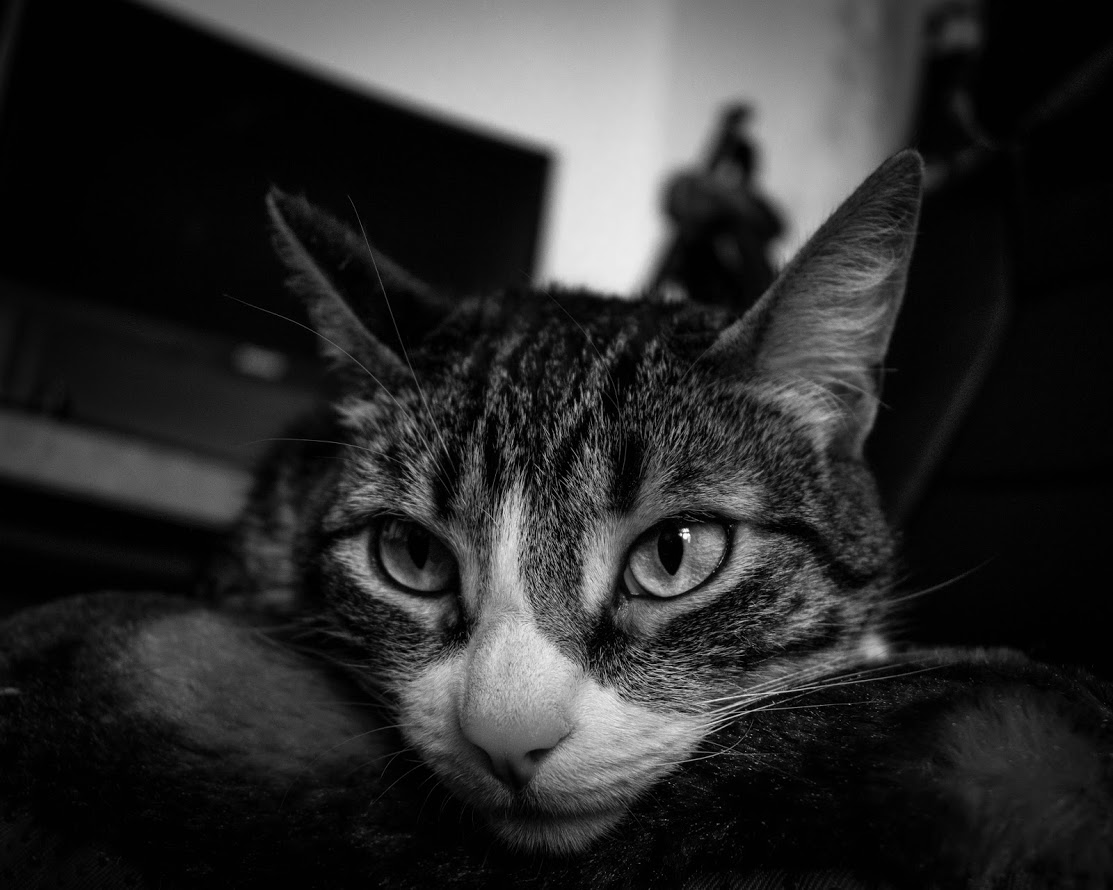

In [15]:
# Utilizaremos una foto de una de mis gatitas c:
cat = Image.open(Path().resolve().parent / "images" / "coyoya.jpg").convert('L')
cat

Para convertirla en un numpy array basta con:

In [16]:
cat_np = np.array(cat)
print(cat_np.shape)

(890, 1113)


#### Ejercicio 3

(10 puntos)

Define la función `low_rank_svd_approximation` tal que:

* Los inputs sean $A$ (la imagen convertida un `np.array` de dimensión 2) y un valor entero $\ell$ que represente la cantidad de términos a sumar de la despomposición SVD (respecto al teorema anterior).
* Retorne la aproximación $A_\ell$
* Imprima el error de la aproximación utilizando la norma de Frobenius.

Luego prueba tu función y observa la imagen con distintos valores de $\ell$.

In [17]:
def low_rank_svd_approximation(A, l):
    u, s, vh = svd(A)
    m, n = np.shape(A)
    A_l = np.zeros(np.shape(A)) #inicializa una matriz nula para ir acumulando la suma
    for i in range(min(l,m,n)): #ciclo para calcular la suma, se detiene cuando i <= min(l, m, n)
        A_l += s[i]*(u[:,i:i+1]@vh[i:i+1,:])
    error = np.linalg.norm(A - A_l,'fro')
    print(f'El error es {error}')
    return A_l

El error es 16045.719759562604


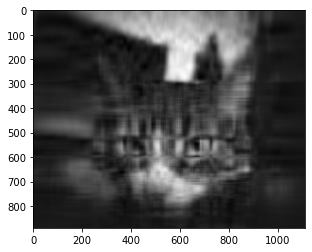

In [18]:
cat10 = low_rank_svd_approximation(cat_np, l=10)
plt.imshow(cat10, cmap='gray');

El error es 8144.192597351401


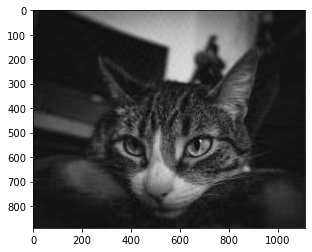

In [19]:
cat50 = low_rank_svd_approximation(cat_np, l=50)
plt.imshow(cat50, cmap='gray');

#### Ejercicio 4

(15 puntos)

En el ejercicio anterior fijaste un rango máximo y obtuviste la aproximación, sin embargo, en otro contexto, te gustaría fijar una tolerancia de error y obtener la mejor aproximación.

Define la función `low_rank_svd_tol_approximation` tal que:

* Los inputs sean $A$ (la imagen convertida un `np.array` de dimensión 2) y $\varepsilon$ (tolerancia relativa) tal que
$$
\left(\frac{\sigma_{\ell+1}^2 + \cdots + \sigma_r^2}{\sigma_1^2 + \cdots + \sigma_r^2}\right)^{1/2} \le \varepsilon.
$$
* Imprima $\ell(\varepsilon)$, es decir, el mayor rango aproximado de $A$ tal que el error de aproximación sea a lo más $\varepsilon$.
* Retorne la aproximación $A_{\ell(\varepsilon)}$

Luego prueba tu función y observa la imagen con distintos valores de $\varepsilon$.

In [20]:
def low_rank_svd_tol_approximation(A, tol):
    l = 0
    e = tol + 1 #inicializa el error relativo de modo que siempre entre al ciclo
    u, s, vh = svd(A) 
    while e**(0.5) > tol: #itera hasta tener un l = l(tol) e <= tol
        e = sum(s[l:]*s[l:])/sum(s*s)
        l+=1
    print(f'El mayor rango aproximado de A para tol = {tol} es l = {l}')
    return low_rank_svd_approximation(A,l) #reutilizamos la función anterior para el l encontrado

In [21]:
x = np.array([0,1,2,3,4,5,6,7,8,9])
x[:1]

array([0])

El mayor rango aproximado de A para tol = 0.1 es l = 65
El error es 7153.205610062083


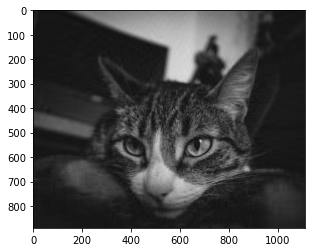

In [22]:
cat_e1 = low_rank_svd_tol_approximation(cat_np, tol=1.e-1)
plt.imshow(cat_e1, cmap='gray');

El mayor rango aproximado de A para tol = 0.01 es l = 458
El error es 717.58835569458


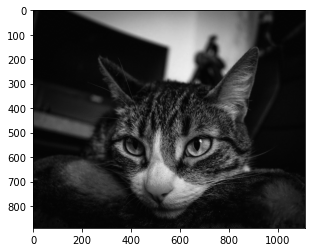

In [23]:
cat_e2 = low_rank_svd_tol_approximation(cat_np, tol=1.e-2)
plt.imshow(cat_e2, cmap='gray');

#### Ejercicio 5

(5 puntos)

Utilizando alguna imagen de tu preferencia utiliza ambas

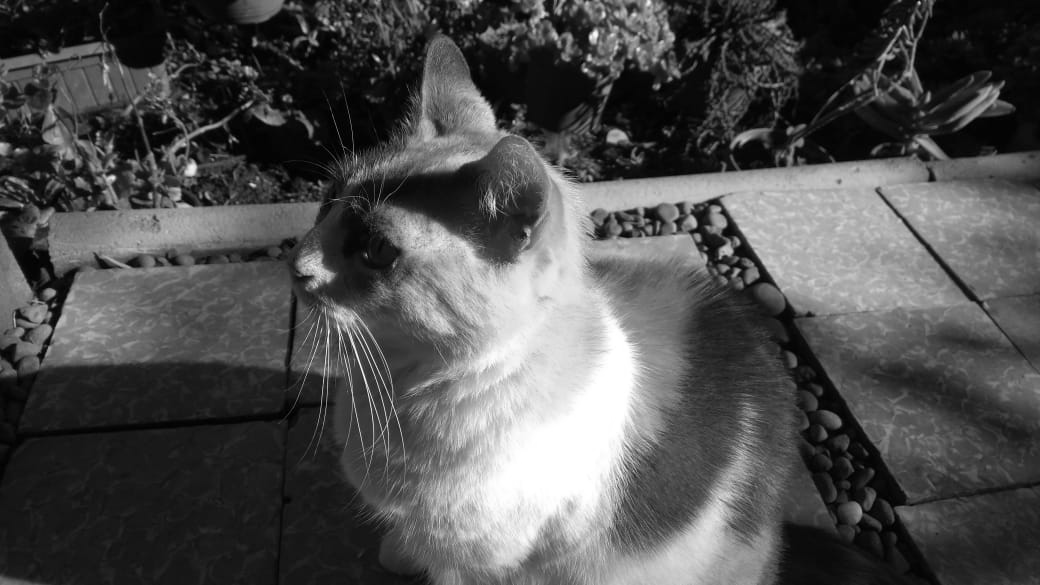

In [24]:
your_img_name = "mancha3.jpeg" #foto de mi gata Mancha
your_img = Image.open(Path().resolve().parent / "images" / your_img_name ).convert('L') 
your_img

In [25]:
your_img_np = np.array(your_img)

El error es 16615.042303073446


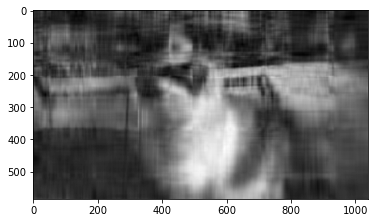

In [26]:
your_img10 = low_rank_svd_approximation(your_img_np, l=10)
plt.imshow(your_img10, cmap='gray');

El error es 12426.691106140126


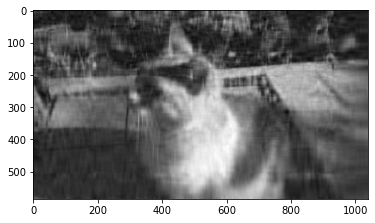

In [27]:
your_img50 = low_rank_svd_approximation(your_img_np, l=20)
plt.imshow(your_img50, cmap='gray');

El mayor rango aproximado de A para tol = 0.1 es l = 47
El error es 7972.04473573108


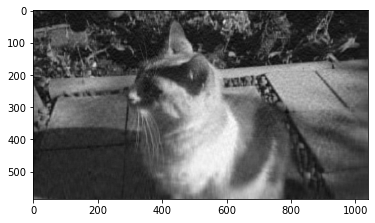

In [28]:
your_img_e1 = low_rank_svd_tol_approximation(your_img_np, tol=1.e-1)
plt.imshow(your_img_e1, cmap='gray');

El mayor rango aproximado de A para tol = 0.01 es l = 304
El error es 797.5568429625681


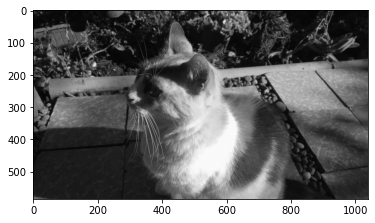

In [29]:
your_img_e2 = low_rank_svd_tol_approximation(your_img_np, tol=1.e-2)
plt.imshow(your_img_e2, cmap='gray');

__Pregunta:__ ¿Será una manera útil de comprimir imágenes en el disco duro o crees que existen otras formas más eficientes?

__Respuesta:__ Es una manera sencilla de implementar, por lo que puede ser útil, pero deben haber mejores formas que reduzcan el tiempo de ejecución.

## COVID-19 en Chile

### *¿Cuál es el panorama actual de Chile frente a la pandemia de COVID-19?*

In [30]:
import pandas as pd
from datetime import date

#### Ejercicio 6

(25 puntos)

Se ha hablado mucho últimamente que Magallanes es una región crítica en cuanto a casos confirmados de COVID-19. Este ejercicio busca constatar a través de los datos aquellas aseveraciones con un indicador siemple pero que parece ser efectivo que bautizaremos como _tasa promedio de casos nuevos_, definida como el promedio de nuevos casos cada cien mil habitantes para un umbral de tiempo determinado.

Utiliza el dataframe `covid_comunas` para obtener el dataframe `covid_tasa_promedio_nuevos` que posee las columnas `region`, `comuna`, `promedio_casos_nuevos`, `poblacion` y `tasa_promedio_casos_nuevos` considerando el umbral de tiempo es entre el 1 y 11 de octubre del año 2020.

Para ello considera lo siguiente:

* No consideres registros que tengan código de comuna nulo.
* Rellena todos los registros de casos totales nulos por cero.
* Considera utilizar `melt` u otro método similar para apilar las columnas de fechas particulares en solo dos columnas, `fecha` y `casos_totales`.
* Define la columna `casos_nuevos` como la diferencia entre dos registros consecutivos para una misma comuna
    - No olvides ordenar por fecha
    - El primer registro de cada comuna debe ser nulo.
    - Considera utilizar el método `transform`.
* Filtra por el umbral de tiempo dado.
* Agrupa por región-comuna y luego define la columna `promedio_casos_nuevos` como el promedio de la columna `casos_nuevos`.
* En caso que hayas _dropeado_ la columna `poblacion` la puedes volver a agregar utilizando `merge` u otro método apropiado. Se asume que la población no cambia durante el tiempo.
* Asigna la columna `tasa_promedio_casos_nuevos` como la cantidad promedio de casos nuevos por cada cien mil habitantes.
* Ordena el dataframe resultante por `tasa_promedio_casos_nuevos` de manera descendente.

Información del dataset: [aquí](https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto1).

In [31]:
covid_comunas = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_comunas.head()

,region,codigo_region,comuna,codigo_comuna,poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,...,2020-10-02,2020-10-05,2020-10-09,2020-10-12,2020-10-16,2020-10-19,2020-10-24,2020-10-26,2020-10-30,tasa
0,Arica y Parinacota,15,Arica,15101.0,247552.0,6.0,6.0,12.0,41.0,63.0,...,8597.0,8772.0,8996.0,9138.0,9343.0,9472.0,9679.0,9763.0,9888.0,3994.3
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,...,27.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,2270.9
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,7901.2
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,67.0,70.0,70.0,70.0,70.0,70.0,71.0,72.0,72.0,2862.8
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.0,36.0,36.0,40.0,43.0,43.0,43.0,44.0,36.0,NaN


In [32]:
start_date = pd.to_datetime('2020-10-01')
end_date = pd.to_datetime('2020-10-11')
start_date

Timestamp('2020-10-01 00:00:00')

In [33]:
covid_tasa_promedio_nuevos = (covid_comunas.loc[lambda x: x['codigo_comuna'].notnull()]
     .drop(['codigo_region','codigo_comuna','tasa'], axis=1) #bota las columnas que no son de interés
     .melt(id_vars = ['region', 'comuna', 'poblacion'], #conserva las columnas region, comuna y poblacion
           var_name = 'fecha', #crea la columna fecha, cuyos valores son los nombres de las columnas restantes
           value_name = 'casos_totales')  # crea la columna casos_totales cuyos valores son los valores restantes de los procesos anteiores
     .assign(fecha = lambda x: pd.to_datetime(x['fecha']))
     .assign(casos_nuevos = lambda x: x.groupby(['comuna'])['casos_totales'].diff())
     .fillna(0)
     .loc[lambda x: (start_date <= x['fecha']) & (x['fecha'] <= end_date)] # filtra en el periodo temporal pedido
     .groupby(['region','comuna']).agg(promedio_casos_nuevos = ('casos_nuevos','mean')) # define los casos nuevos
     .merge(covid_comunas[{'region','comuna','poblacion'}], how = 'left',on=['region','comuna']) # junta los df conservando todo el df al que se le aplicó el .merge
     .assign(tasa_promedio_casos_nuevos = lambda x: (x['promedio_casos_nuevos']*100000)/x['poblacion'])
     .sort_values('tasa_promedio_casos_nuevos',ascending = False)
)

In [34]:
covid_tasa_promedio_nuevos

,region,comuna,promedio_casos_nuevos,poblacion,tasa_promedio_casos_nuevos
163,Magallanes,Timaukel,3.333333,282.0,1182.033097
162,Magallanes,San Gregorio,4.000000,681.0,587.371512
156,Magallanes,Laguna Blanca,1.333333,264.0,505.050505
158,Magallanes,Porvenir,34.333333,7323.0,468.842460
160,Magallanes,Punta Arenas,631.333333,141984.0,444.651040
...,...,...,...,...,...
61,Aysén,OHiggins,0.000000,661.0,0.000000
109,Coquimbo,Rio Hurtado,0.000000,4372.0,0.000000
57,Aysén,Cochrane,0.000000,3685.0,0.000000
154,Magallanes,Antartica,0.000000,137.0,0.000000


__Pregunta:__ ¿Qué puedes observar respecto a las comunas que tienen mayor Tasa Promedio de Casos Nuevos?

__Respuesta:__ Son de la región de Magallanes, por tanto los datos dicen que Magallanes sí está en una situación crítica respecto a la pandemia.

#### Ejercicio 7

(15 puntos)

¿Hay correlación entre la cantidad de exámenes PCR y los casos confirmados en cada comuna?


Información del dataset: [aquí](https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto7).

In [35]:
covid_pcr = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto7/PCR.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_pcr.head()

,region,codigo_region,poblacion,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,...,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31,2020-11-01
0,Arica y Parinacota,15,252110,70.0,NaN,93.0,103.0,NaN,93.0,24.0,...,794,738,737,832,542,343,706,777,1058,1025
1,Tarapacá,1,382773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,972,932,1046,1044,796,714,694,946,1752,906
2,Antofagasta,2,691854,182.0,128.0,107.0,175.0,103.0,95.0,117.0,...,1571,1890,2239,3825,1749,1354,1858,1238,1906,2549
3,Atacama,3,314709,57.0,52.0,60.0,25.0,20.0,22.0,25.0,...,792,838,1020,939,563,340,237,838,863,781
4,Coquimbo,4,836096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1008,1128,1057,1026,473,1503,1050,1125,1351,1245


Obtén el dataframe `covid_pcr_melt` utilizando `covid_pcr` tal que:

* Tenga las columnas `region`, `fecha` y `nm_pcr`.
* `fecha` sea del tipo `datetime64`.
* `nm_pcr` sea el número de PCR realizados y rellena los valores nulos por cero.

In [36]:
covid_pcr_melt = (covid_pcr.drop(['codigo_region','poblacion'],axis=1)
        .melt(id_vars = 'region', # conserva la columna region
              var_name = 'fecha', # crea la columna fecha, cuyos values son los nombres de las columnas restantes
              value_name = 'nm_pcr' #los values restantes quedan en la columna nm_pcr
    ).fillna(0).assign(fecha = lambda x: pd.to_datetime(x['fecha'])) #cambia la fecha a formato fecha
)

covid_pcr_melt

,region,fecha,nm_pcr
0,Arica y Parinacota,2020-04-09,70.0
1,Tarapacá,2020-04-09,0.0
2,Antofagasta,2020-04-09,182.0
3,Atacama,2020-04-09,57.0
4,Coquimbo,2020-04-09,0.0
...,...,...,...
3307,Araucanía,2020-11-01,1878.0
3308,Los Ríos,2020-11-01,836.0
3309,Los Lagos,2020-11-01,5232.0
3310,Aysén,2020-11-01,333.0


Obtén el dataframe `covid_casos_melt` utilizando `covid_comunas` tal que:

* Tenga las columnas `region`, `fecha` y `casos_totales`.
* Rellena los valores nulos con cero.
* `fecha` sea del tipo `datetime64`.
* `casos_totales` sea la cantidad de casos totales por región y fecha.

In [37]:
covid_casos_melt = (covid_comunas.loc[lambda x: x['codigo_comuna'].notnull()]
     .drop(['codigo_region','codigo_comuna','tasa','poblacion','comuna'], axis=1)
     .melt(id_vars = 'region', 
           var_name = 'fecha',
           value_name = 'casos_totales'
     ).fillna(0).assign(fecha = lambda x: pd.to_datetime(x['fecha']))
     .groupby(['region','fecha']).agg({'casos_totales':'sum'}) # agrupa por region y fecha y suma los casos totakes, oara tener un único registro por región y fecha.
)

covid_casos_melt

casos_totales
region      fecha                    
Antofagasta 2020-03-30           29.0
            2020-04-01           32.0
            2020-04-03           49.0
            2020-04-06           65.0
            2020-04-08           72.0
...                               ...
Ñuble       2020-10-16         9127.0
            2020-10-19         9268.0
            2020-10-24         9532.0
            2020-10-26         9632.0
            2020-10-30         9813.0

[1024 rows x 1 columns]

Finalmente, obtén la serie `covid_corr_casos_pcr` de la siguiente manera:

* Une `covid_pcr_melt` y `covid_casos_melt` a través de _merge_, utilizando la región y la fecha como llave, además conserva todos los registros (tanto derecha como izquierda).
* Rellena los números de PCR con el valor cero.
* Haz un `ffill` a los casos totales.
* Agrupa por región y obtén la correlación entre `nm_pcr` y `casos_totales`.
* Ordena los valores ascendentemente.

In [38]:
covid_corr_casos_pcr = (
    pd.merge(covid_pcr_melt, covid_casos_melt, how = 'outer', on = ['region', 'fecha'])
)
covid_corr_casos_pcr['nm_pcr'] = covid_corr_casos_pcr['nm_pcr'].fillna(0)
covid_corr_casos_pcr['casos_totales'] = covid_corr_casos_pcr['casos_totales'].fillna(method = 'ffill')
covid_corr_casos_pcr = covid_corr_casos_pcr.groupby(["region"]).apply(lambda df: df["nm_pcr"].corr(df["casos_totales"])).sort_values()

covid_corr_casos_pcr

region
Metropolitana         0.336986
Valparaíso            0.540699
Antofagasta           0.571693
Atacama               0.591216
Aysén                 0.632450
Biobío                0.653196
O’Higgins             0.656802
Magallanes            0.665586
Maule                 0.674223
Tarapacá              0.695472
Los Ríos              0.715616
Ñuble                 0.723963
Los Lagos             0.748000
Coquimbo              0.752307
Arica y Parinacota    0.790215
Araucanía             0.839065
dtype: float64

__Pregunta:__ ¿Qué puedes inferir del análisis anterior? ¿Se condice con tu sentido común?

__Respuesta:__ Fuera de la región Metropolitana, parece haber una correlación lineal entre los los exámenes tomados y los casos totales, lo que tiene sentido, porque mientras más exámenes se hacen, más información se tiene. Sin embargo en la región metropolitanano hay evidencia para decir que hay una correlación lineal entre el número de pcr y la cantidad de casos totales, ya que la correlación es muy baja, esto podría ir en contra al sentido común 

#### Ejercicio 8

(10 puntos)

Propón y responde una pregunta que puedas resolver analizando dos o más conjuntos de datos del repositorio oficial de datos COVID-19 del Ministerio de Ciencia, Tecnología e Innovación de Chile ([link](https://github.com/MinCiencia/Datos-COVID19)).

Se evaluará originalidad, análisis de datos, calidad de la pregunta y respuesta.

__Pregunta:__

In [39]:
# FIX ME PLEASE #

__Respuesta:__

#### Ejercicio 9

(10 puntos)

Propón y responde una pregunta que puedas resolver analizando dos o más conjuntos de datos del repositorio oficial de datos COVID-19 del Ministerio de Ciencia, Tecnología e Innovación de Chile ([link](https://github.com/MinCiencia/Datos-COVID19)). Sin utilizar ninguno de los datasets que hayas utilizado en el ejercicio 8.

Se evaluará originalidad, análisis de datos, calidad de la pregunta y respuesta.

__Pregunta:__

In [40]:
# FIX ME PLEASE #

__Respuesta:__